In [5]:
import numpy as np 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd 


iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
print(df)




     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


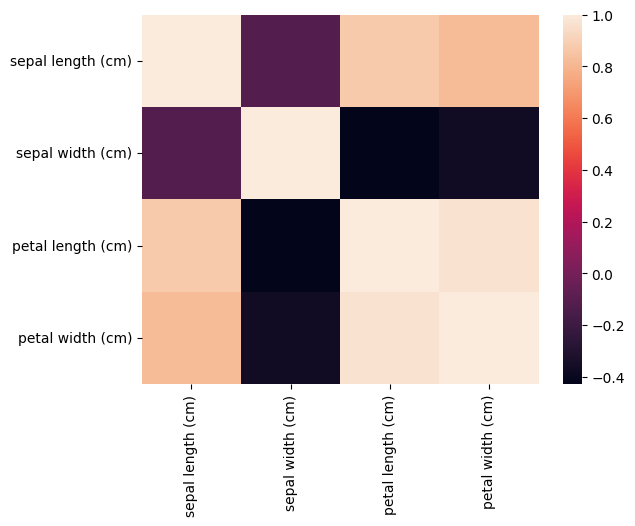

In [6]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
plt.show()



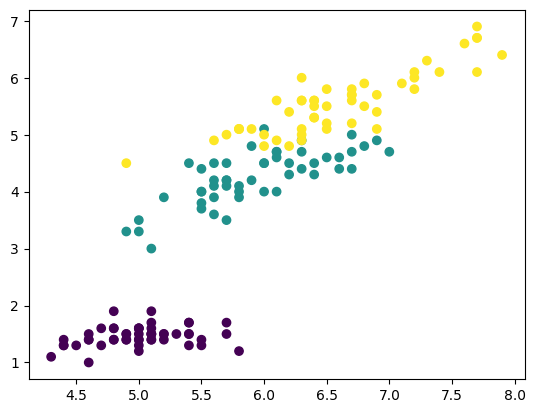

In [7]:
sepal_length = df['sepal length (cm)']
petal_length = df['petal length (cm)']


plt.scatter(sepal_length, petal_length , c = iris.target)
plt.show()

In [15]:
X= df['sepal length (cm)']
y=df['petal length (cm)']


m =0
c =0
learning_rate = 0.001
threshold = 0.0000001
n = float(len(X))

while True:
    y_pred = m*X +c
    dm = (-2/n)*sum(X*(y-y_pred))
    dc = (-2/n)*sum(y-y_pred)
    new_m = m - learning_rate * dm
    new_c = c - learning_rate * dc
    if(abs(new_m-m) <threshold and abs(new_c-c) <threshold):
       break


    m = new_m
    c = new_c
    y_pred = m * X + c


print(m,c)
      

1.857991714077667 -7.098814916895511


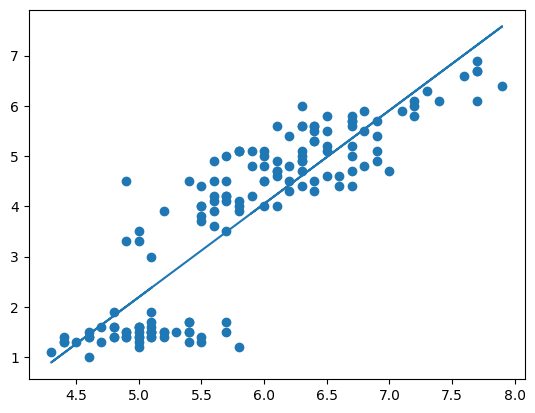

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.show()

In [17]:
mse = np.mean((y-y_pred)**2)
print("mse: ", mse)

mse:  0.74306116925611


## multi linear


In [21]:
X1= df['sepal length (cm)']
X2=df['petal width (cm)']
y=df['petal length (cm)']


m =np.zeros(2)
c =0
learning_rate = 0.001
threshold = 0.0000001

n = float(len(X))

while True:
    y_pred1 = m[0]*X1+m[1]*X2+c
    dm1 = (-2/n)*(sum(X1*(y-y_pred1)))
    dm2 = (-2/n)*(sum(X2*(y-y_pred1)))
    dc = (-2/n)*np.mean(y-y_pred)
    new_m1 = m[0] - learning_rate * dm1
    new_m2 = m[1] - learning_rate * dm2
    new_c = c - learning_rate * dc
    if(abs(new_m1-m[0]) <threshold and abs(new_m2-m[1]) <threshold and abs(new_c-c) <threshold):
       break


    m[0] = new_m1
    m[1] = new_m2
    c = new_c
    y_pred1 = m[0]*X1+m[1]*X2+c



print(m[0],m[1],c)
      

0.23734683602121617 1.9890304474855258 -8.500502035387407e-06


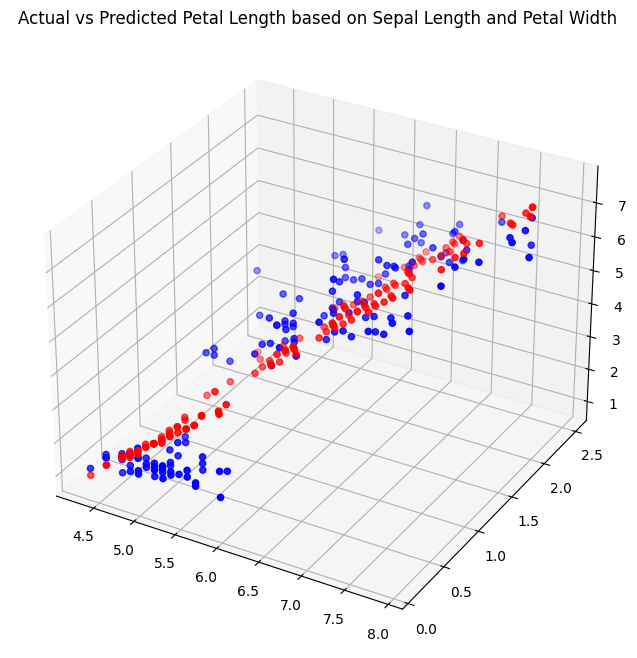

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, y, c='blue', label='Actual Petal Length')
ax.scatter(X1, X2, y_pred, c='red', label='Predicted Petal Length')

ax.set_title('Actual vs Predicted Petal Length based on Sepal Length and Petal Width')

plt.show()

In [23]:
mse1 = np.mean((y-y_pred1)**2)
print("mse: ", mse1)

mse:  0.18103058208690803


## polynomial


In [25]:

X = df['sepal length (cm)']
y = df['petal length (cm)']

# Initialize parameters
m = 0
c = 0
learning_rate = 0.001
threshold = 0.0000001
n = float(len(X))

# Perform gradient descent
while True:
    y_pred2 = m * X ** 2 + c  # Quadratic relationship
    dm = (-2/n)*(sum(X ** 2 * (y - y_pred2)))
    dc = (-2/n) * sum(y - y_pred2)
    new_m = m - learning_rate * dm
    new_c = c - learning_rate * dc
    if abs(new_m - m) < threshold and abs(new_c - c) < threshold:
        break

    m = new_m
    c = new_c
    y_pred2 = m * X ** 2 + c

# Output optimized parameters
print("Optimized quadratic coefficient (m):", m)
print("Optimized intercept (c):", c)

# Plot the data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Quadratic Regression Model')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Quadratic Regression Model')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Mean Squared Error (MSE)
mse = np.mean((y - y_pred) ** 2)
print("Mean Squared Error (MSE):", mse)

KeyboardInterrupt: 